# Clustering

In [ ]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading the excel file
df=pd.read_excel("C:/Users/Kulkarni/Desktop/Project 6-Segmenting customers into clusters-Dataset.xlsx")

In [ ]:
print("No. of rows: ", df.shape[0])
print("No. of columns: ", df.shape[1])

No. of rows:  541909
No. of columns:  8


In [ ]:
df.head()

InvoiceNo StockCode  ... CustomerID         Country
0    536365    85123A  ...    17850.0  United Kingdom
1    536365     71053  ...    17850.0  United Kingdom
2    536365    84406B  ...    17850.0  United Kingdom
3    536365    84029G  ...    17850.0  United Kingdom
4    536365    84029E  ...    17850.0  United Kingdom

[5 rows x 8 columns]

In [ ]:
df.tail()

InvoiceNo StockCode  ... CustomerID  Country
541904    581587     22613  ...    12680.0   France
541905    581587     22899  ...    12680.0   France
541906    581587     23254  ...    12680.0   France
541907    581587     23255  ...    12680.0   France
541908    581587     22138  ...    12680.0   France

[5 rows x 8 columns]

### EDA and Feature Engineering

In [ ]:
# Check for the missing values if any

print("No. of missing values in each columns: \n")
print(df.isnull().sum())

No. of missing values in each columns: 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
df1 = df.dropna(subset=['Description', 'CustomerID'])

In [ ]:
# Check for the duplicate records if any
print("No. of duplicate records: ", df.duplicated().sum())

No. of duplicate records:  5268


In [ ]:
df1.drop_duplicates(keep='first', inplace=True)

In [ ]:
print("No. of duplicate records: ", df1.duplicated().sum())

No. of duplicate records:  0


In [ ]:
df1.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [ ]:
# Check the datatype of all features in the dataset

df1.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
df1['Invoice_day'] = df1['InvoiceDate'].dt.day
df1['Invoice_hour'] = df1['InvoiceDate'].dt.hour
df1['Invoice_weekday'] = df1['InvoiceDate'].dt.weekday

In [ ]:
df1[['Invoice_day', 'Invoice_hour', 'Invoice_weekday']].head(3)

Invoice_day  Invoice_hour  Invoice_weekday
0            1             8                2
1            1             8                2
2            1             8                2

In [ ]:
df1['total_price'] = df1['Quantity'] * df1['UnitPrice']

In [ ]:
df1.head(3)

InvoiceNo StockCode  ... Invoice_weekday  total_price
0    536365    85123A  ...               2        15.30
1    536365     71053  ...               2        20.34
2    536365    84406B  ...               2        22.00

[3 rows x 12 columns]

In [ ]:
df1.head()

InvoiceNo StockCode  ... Invoice_weekday  total_price
0    536365    85123A  ...               2        15.30
1    536365     71053  ...               2        20.34
2    536365    84406B  ...               2        22.00
3    536365    84029G  ...               2        20.34
4    536365    84029E  ...               2        20.34

[5 rows x 12 columns]

In [ ]:
label_encoder = LabelEncoder()

# Encode labels in column 'InvoiceNo'.
df1['InvoiceNo'] = df1['InvoiceNo'].astype(str)
df1['InvoiceNo_encoded']= label_encoder.fit_transform(df1['InvoiceNo'])

In [ ]:
# Encode labels in column 'StockCode'.
df1['StockCode'] = df1['StockCode'].astype(str)
df1['StockCode_encoded']= label_encoder.fit_transform(df1['StockCode'])

In [ ]:
# Encode labels in column 'Description'.
df1['Description_encoded']= label_encoder.fit_transform(df1['Description'])
df1['Country_encoded']= label_encoder.fit_transform(df1['Country'])

In [ ]:
df1.head()

InvoiceNo StockCode  ... Description_encoded  Country_encoded
0    536365    85123A  ...                3716               35
1    536365     71053  ...                3724               35
2    536365    84406B  ...                 861               35
3    536365    84029G  ...                1813               35
4    536365    84029E  ...                2776               35

[5 rows x 16 columns]

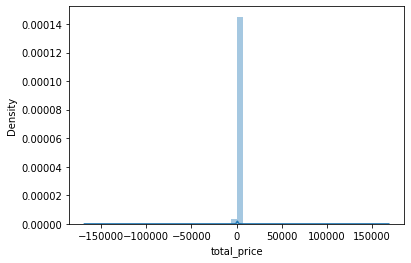

In [ ]:
# Let's the skewness
# before log transform
sns.distplot(df1['total_price'])
plt.show()

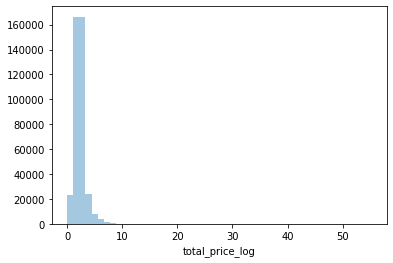

In [ ]:
# After log transform of trip duration in seconds
df1['total_price_log'] = df1['total_price']**(1/3)
sns.distplot(df1['total_price_log'], kde = False)
plt.show()

In [ ]:
df2 = df1.drop(columns=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'Country', 'total_price'], axis=1)

In [ ]:
df2.head(3)

CustomerID  Invoice_day  ...  Country_encoded  total_price_log
0     17850.0            1  ...               35         2.482545
1     17850.0            1  ...               35         2.729713
2     17850.0            1  ...               35         2.802039

[3 rows x 9 columns]

In [ ]:
# Scaling the data

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df2)

df3 = pd.DataFrame(x_scaled, columns=df2.columns)

In [ ]:
df3.head(3)

CustomerID  Invoice_day  ...  Country_encoded  total_price_log
0    0.926443          0.0  ...         0.972222         0.044949
1    0.926443          0.0  ...         0.972222         0.049425
2    0.926443          0.0  ...         0.972222         0.050734

[3 rows x 9 columns]

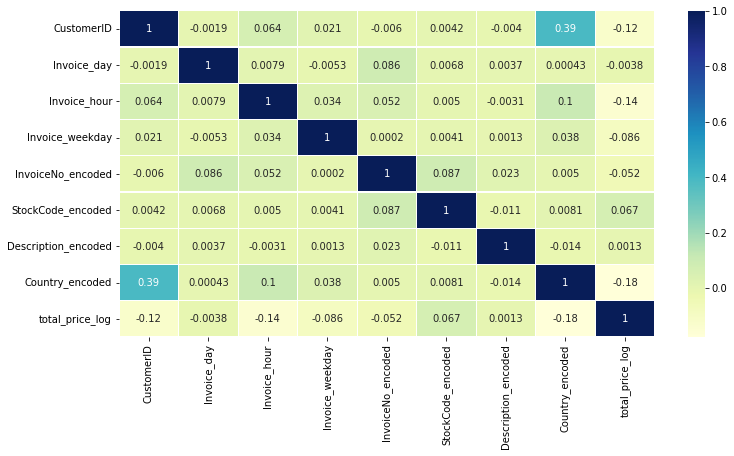

In [ ]:
# Check the correlation among all features

plt.figure(figsize=(12, 6))
corr = df3.corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu", annot=True)

In [ ]:
df3.isnull().sum()

CustomerID                0
Invoice_day               0
Invoice_hour              0
Invoice_weekday           0
InvoiceNo_encoded         0
StockCode_encoded         0
Description_encoded       0
Country_encoded           0
total_price_log        8872
dtype: int64

In [ ]:
df4 = df3.dropna(subset=['total_price_log'])

Let's use elbow curve method to find value of k

In [ ]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df4)
    sse[k] = kmeans.inertia_ # SSE to the closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

From above graph, the k-value of 2 is the best hyperparameter for our model because the next k-value tend to have a linear trend. Hence, our best model for the data is K-Means with the number of clusters is 2.

Building model

In [ ]:
model = KMeans(n_clusters=2, random_state=42)

model.fit(df4)
model.labels_.shape

(392732,)

Visualizing the clusters

In [ ]:
# Create the dataframe
df_normalized = pd.DataFrame(df4, columns=['Invoice_day', 'Invoice_hour', 'Invoice_weekday', 'InvoiceNo_encoded',
                                           'StockCode_encoded', 'Description_encoded', 'Country_encoded', 'Total_price'])
df_normalized['ID'] = df4.CustomerID
df_normalized['Cluster'] = model.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Invoice_day', 'Invoice_hour', 'Invoice_weekday', 'InvoiceNo_encoded',
                                           'StockCode_encoded', 'Description_encoded', 'Country_encoded', 'Total_price'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it

plt.figure(figsize=(12, 6))

ax = sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)